In [257]:
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
# ensemble learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
# metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve


Introduction. 
The project will concern the classification of malicious software.
For the computer's defence system to properly aggregate, it is essential to recognize the threat
and the introduction of appropriate tools for a given type of danger. Additionally presented
in the project, the algorithm can be used for reporting purposes, to know how many and what malware are attacking us, which will allow
taking appropriate precautions.

Loading data

In [258]:
df = pd.read_csv('data.csv')


Dataset analysis

I'm doing a general data check. I check how many records I have, and how many variables I have. What type of variables predominate, or continuous or integer variables.

In [259]:
df

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,...,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm,Class
0,436,646.0,0.0,10.0,9.0,0.0,228.0,0.0,56.0,89930,...,1.0,0.0,892.0,53.0,10.0,0.0,162.0,118529,6874624,2
1,469,262.0,0.0,4.0,1.0,4.0,185.0,4.0,20.0,3464,...,3.0,7.0,846.0,8.0,0.0,9.0,19.0,7937,460288,8
2,1587,1828.0,0.0,0.0,31.0,0.0,689.0,0.0,904.0,24833,...,1.0,0.0,4005.0,680.0,44.0,0.0,418.0,90625,5256192,9
3,213,227.0,0.0,0.0,3.0,0.0,127.0,0.0,132.0,71979,...,0.0,0.0,437.0,78.0,0.0,0.0,199.0,83201,4825600,9
4,36,76.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,112,...,2.0,3.0,82.0,16.0,0.0,0.0,18.0,12289,712704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,235,98.0,36.0,26.0,0.0,22.0,155.0,28.0,56.0,1768,...,33.0,37.0,368.0,36.0,9.0,67.0,64.0,8449,489984,4
10864,60,43.0,0.0,0.0,9.0,0.0,1.0,0.0,39.0,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10753,623616,4
10865,277,151.0,1.0,8.0,11.0,1.0,58.0,2.0,128.0,6319,...,0.0,18.0,463.0,30.0,16.0,34.0,73.0,40193,2331136,4
10866,101,45.0,0.0,16.0,1.0,0.0,31.0,16.0,3.0,708,...,0.0,1.0,111.0,13.0,0.0,36.0,38.0,15105,876032,4


In [260]:
df.shape

(10868, 69)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asm_commands_add    10868 non-null  int64  
 1   asm_commands_call   10868 non-null  float64
 2   asm_commands_cdq    10868 non-null  float64
 3   asm_commands_cld    10868 non-null  float64
 4   asm_commands_cli    10868 non-null  float64
 5   asm_commands_cmc    10868 non-null  float64
 6   asm_commands_cmp    10868 non-null  float64
 7   asm_commands_cwd    10868 non-null  float64
 8   asm_commands_daa    10868 non-null  float64
 9   asm_commands_dd     10868 non-null  int64  
 10  asm_commands_dec    10868 non-null  float64
 11  asm_commands_dw     10868 non-null  float64
 12  asm_commands_endp   10868 non-null  float64
 13  asm_commands_faddp  10868 non-null  float64
 14  asm_commands_fchs   10868 non-null  float64
 15  asm_commands_fdiv   10868 non-null  float64
 16  asm_

In [262]:
for col in df:
    print(df[col].unique())

[ 436  469 1587 ... 2036  938 1633]
[ 646.  262. 1828. ... 2223. 2820. 1124.]
[0.000e+00 1.600e+01 2.500e+01 1.100e+01 1.000e+00 1.800e+01 2.000e+00
 2.200e+01 1.000e+01 1.700e+01 4.000e+00 2.900e+01 6.000e+00 7.000e+00
 1.200e+01 3.800e+01 1.500e+01 1.200e+02 5.400e+01 2.600e+01 2.000e+01
 2.700e+01 2.390e+02 4.400e+01 3.000e+00 1.900e+01 5.040e+02 3.300e+01
 1.400e+01 1.300e+01 4.600e+01 2.400e+01 2.100e+01 3.900e+01 3.700e+01
 5.000e+00 6.700e+01 7.200e+01 2.410e+02 1.310e+02 8.800e+01 3.100e+01
 9.000e+00 8.000e+00 2.920e+02 1.770e+02 4.300e+01 9.800e+01 5.700e+01
 3.000e+01 5.200e+01 1.400e+02 8.200e+01 1.370e+02 5.600e+01 1.430e+02
 1.280e+02 5.100e+01 9.300e+01 1.210e+02 4.500e+01 4.200e+01 6.730e+02
 8.600e+01 5.800e+01 7.000e+01 4.000e+01 2.050e+02 6.300e+01 7.100e+01
 1.130e+02 4.360e+02 7.400e+01 3.500e+01 1.610e+02 7.500e+01 1.880e+02
 3.210e+02 8.400e+01 1.450e+02 6.600e+01 9.500e+01 8.700e+01 4.800e+01
 5.500e+01 9.900e+01 2.100e+02 2.800e+02 2.800e+01 3.200e+01 1.520e+02

Analysis of uniques in variables

In [263]:
print(df.apply(lambda col: col.unique()))

asm_commands_add     [436, 469, 1587, 213, 36, 58, 202, 604, 1812, ...
asm_commands_call    [646.0, 262.0, 1828.0, 227.0, 76.0, 13.0, 320....
asm_commands_cdq     [0.0, 16.0, 25.0, 11.0, 1.0, 18.0, 2.0, 22.0, ...
asm_commands_cld     [10.0, 4.0, 0.0, 1.0, 3.0, 10218.0, 5.0, 24.0,...
asm_commands_cli     [9.0, 1.0, 31.0, 3.0, 0.0, 6.0, 23.0, 2.0, 7.0...
                                           ...                        
asm_commands_xchg    [0.0, 9.0, 4.0, 8.0, 148.0, 1.0, 91.0, 3.0, 2....
asm_commands_xor     [162.0, 19.0, 418.0, 199.0, 18.0, 10.0, 95.0, ...
line_count_asm       [118529, 7937, 90625, 83201, 12289, 14337, 152...
size_asm             [6874624, 460288, 5256192, 4825600, 712704, 83...
Class                                      [2, 8, 9, 1, 6, 3, 7, 4, 5]
Length: 69, dtype: object


In [264]:
df.nunique()

asm_commands_add     2122
asm_commands_call    1993
asm_commands_cdq      191
asm_commands_cld      210
asm_commands_cli      200
                     ... 
asm_commands_xchg     196
asm_commands_xor     1309
line_count_asm        911
size_asm              990
Class                   9
Length: 69, dtype: int64

In [265]:
for col in X_train:
    print(f'{col}, {X_train[col].dtype}')
    print(X_train[col].nunique())
    print()

asm_commands_add, int64
1819

asm_commands_call, float64
1676

asm_commands_cdq, float64
165

asm_commands_cld, float64
169

asm_commands_cli, float64
171

asm_commands_cmc, float64
46

asm_commands_cmp, float64
1289

asm_commands_cwd, float64
44

asm_commands_daa, float64
841

asm_commands_dd, int64
4482

asm_commands_dec, float64
1282

asm_commands_dw, float64
2597

asm_commands_endp, float64
820

asm_commands_faddp, float64
70

asm_commands_fchs, float64
51

asm_commands_fdiv, float64
84

asm_commands_fdivr, float64
47

asm_commands_fistp, float64
51

asm_commands_fld, float64
278

asm_commands_fstp, float64
276

asm_commands_fword, float64
125

asm_commands_fxch, float64
99

asm_commands_imul, float64
498

asm_commands_in, int64
1966

asm_commands_inc, float64
676

asm_commands_ins, float64
297

asm_commands_jb, float64
449

asm_commands_je, float64
295

asm_commands_jg, float64
457

asm_commands_jl, float64
542

asm_commands_jmp, float64
1115

asm_commands_jnb, float64
263

asm_co

I check for missing values

In [266]:
df.isna().sum()

asm_commands_add     0
asm_commands_call    0
asm_commands_cdq     0
asm_commands_cld     0
asm_commands_cli     0
                    ..
asm_commands_xchg    0
asm_commands_xor     0
line_count_asm       0
size_asm             0
Class                0
Length: 69, dtype: int64

In [267]:
df.isna().sum().sum()

0

I check the distribution of individual variables. This analysis shows that data standardization should be done
increase the accuracy of the model.

In [268]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()


In [269]:
num_columns

['asm_commands_add',
 'asm_commands_call',
 'asm_commands_cdq',
 'asm_commands_cld',
 'asm_commands_cli',
 'asm_commands_cmc',
 'asm_commands_cmp',
 'asm_commands_cwd',
 'asm_commands_daa',
 'asm_commands_dd',
 'asm_commands_dec',
 'asm_commands_dw',
 'asm_commands_endp',
 'asm_commands_faddp',
 'asm_commands_fchs',
 'asm_commands_fdiv',
 'asm_commands_fdivr',
 'asm_commands_fistp',
 'asm_commands_fld',
 'asm_commands_fstp',
 'asm_commands_fword',
 'asm_commands_fxch',
 'asm_commands_imul',
 'asm_commands_in',
 'asm_commands_inc',
 'asm_commands_ins',
 'asm_commands_jb',
 'asm_commands_je',
 'asm_commands_jg',
 'asm_commands_jl',
 'asm_commands_jmp',
 'asm_commands_jnb',
 'asm_commands_jno',
 'asm_commands_jo',
 'asm_commands_jz',
 'asm_commands_lea',
 'asm_commands_mov',
 'asm_commands_mul',
 'asm_commands_not',
 'asm_commands_or',
 'asm_commands_out',
 'asm_commands_outs',
 'asm_commands_pop',
 'asm_commands_push',
 'asm_commands_rcl',
 'asm_commands_rcr',
 'asm_commands_rep',
 'asm_

*** asm_commands_add: 2122


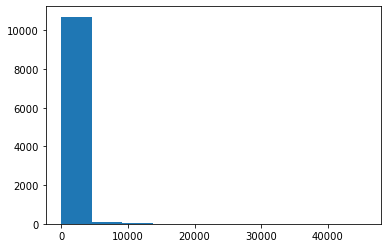

*** asm_commands_call: 1993


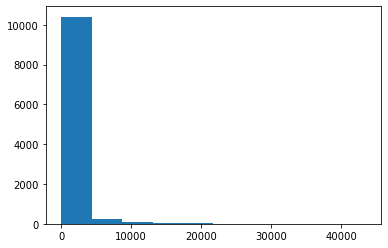

*** asm_commands_cdq: 191


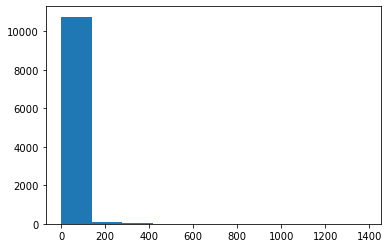

*** asm_commands_cld: 210


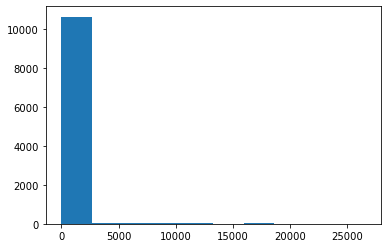

*** asm_commands_cli: 200


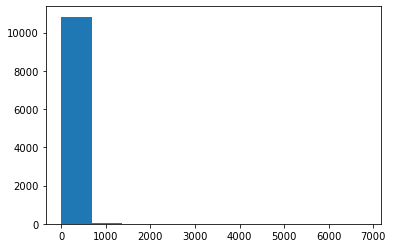

*** asm_commands_cmc: 54


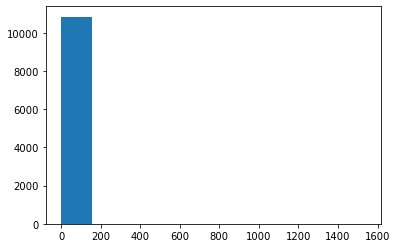

*** asm_commands_cmp: 1563


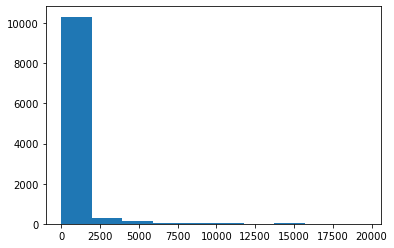

*** asm_commands_cwd: 46


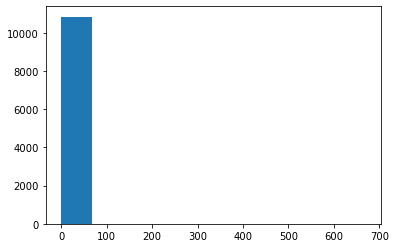

*** asm_commands_daa: 1007


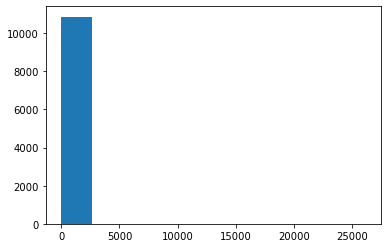

*** asm_commands_dd: 6180


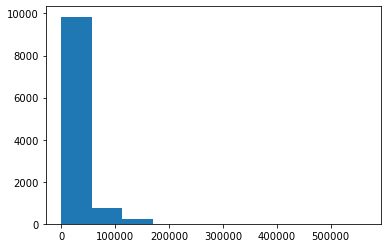

*** asm_commands_dec: 1495


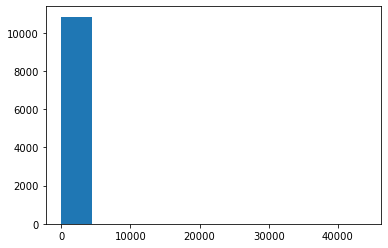

*** asm_commands_dw: 3143


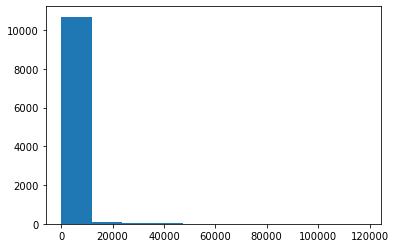

*** asm_commands_endp: 975


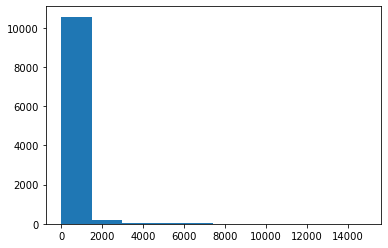

*** asm_commands_faddp: 80


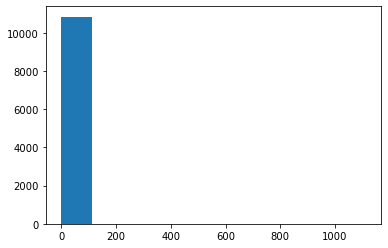

*** asm_commands_fchs: 56


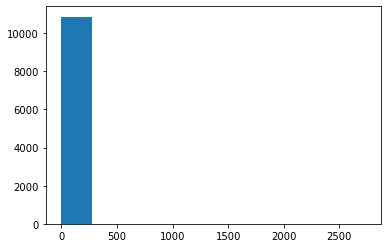

*** asm_commands_fdiv: 92


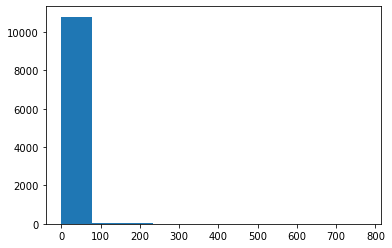

*** asm_commands_fdivr: 52


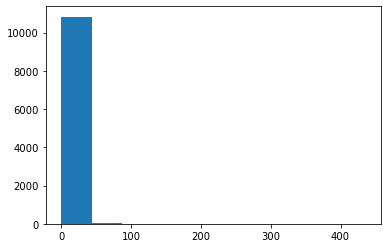

*** asm_commands_fistp: 55


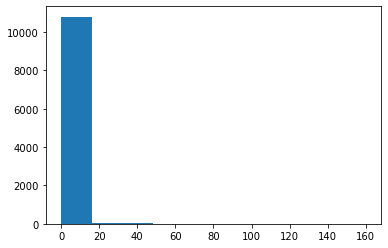

*** asm_commands_fld: 337


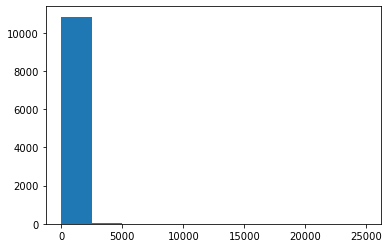

*** asm_commands_fstp: 327


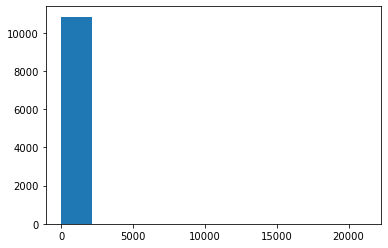

*** asm_commands_fword: 142


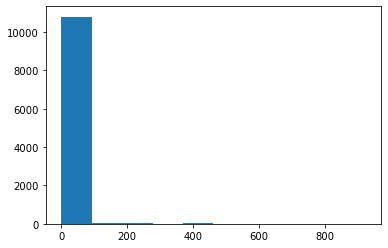

*** asm_commands_fxch: 116


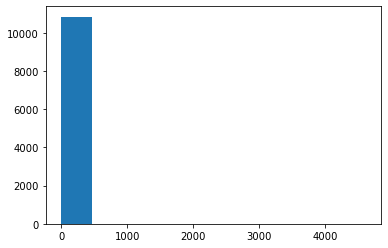

*** asm_commands_imul: 595


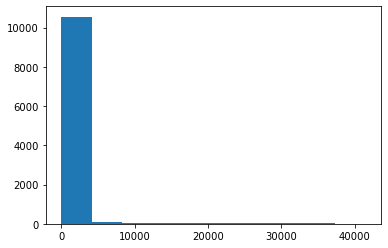

*** asm_commands_in: 2314


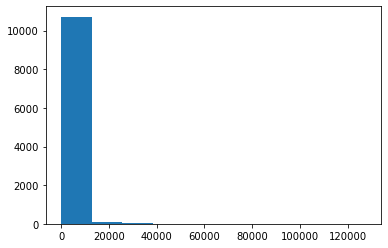

*** asm_commands_inc: 795


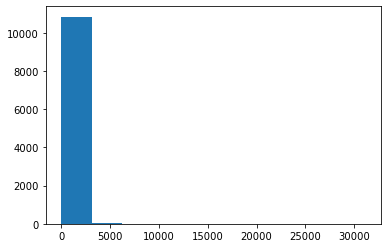

*** asm_commands_ins: 353


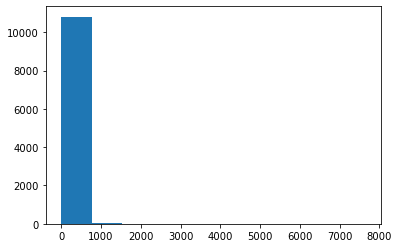

*** asm_commands_jb: 526


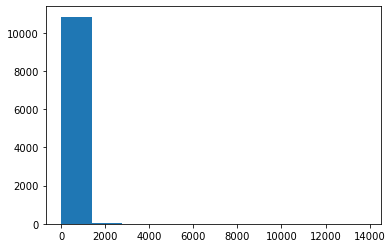

*** asm_commands_je: 354


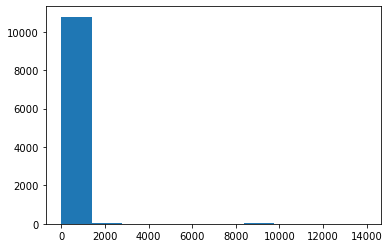

*** asm_commands_jg: 516


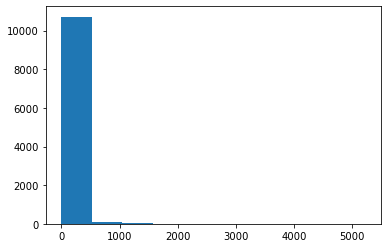

*** asm_commands_jl: 629


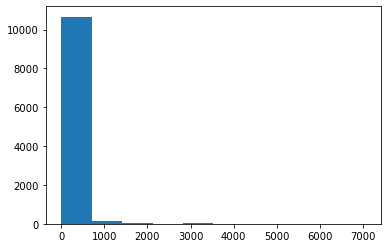

*** asm_commands_jmp: 1351


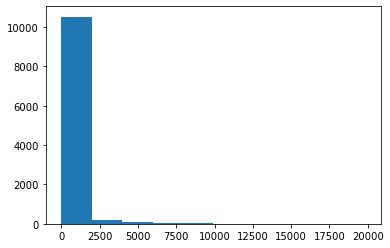

*** asm_commands_jnb: 307


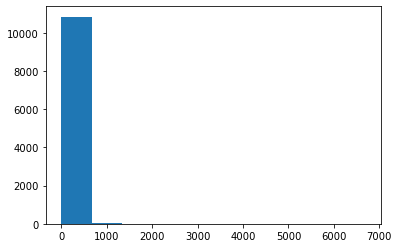

*** asm_commands_jno: 51


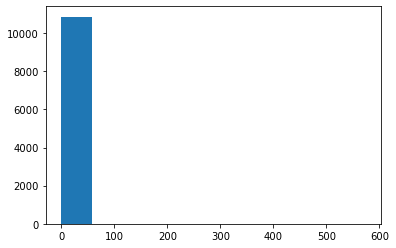

*** asm_commands_jo: 115


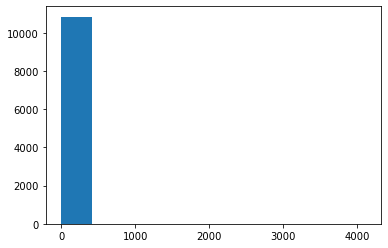

*** asm_commands_jz: 1268


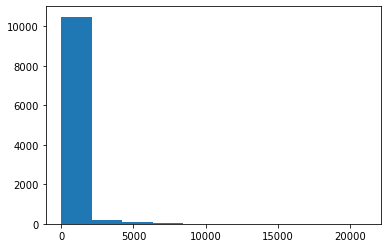

*** asm_commands_lea: 1479


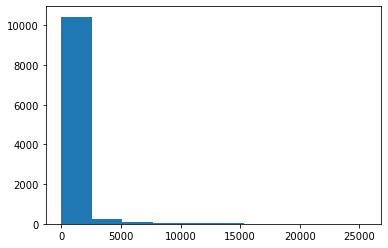

*** asm_commands_mov: 3805


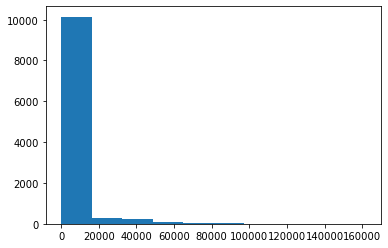

*** asm_commands_mul: 655


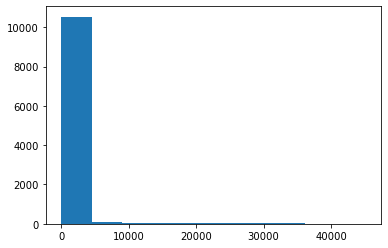

*** asm_commands_not: 329


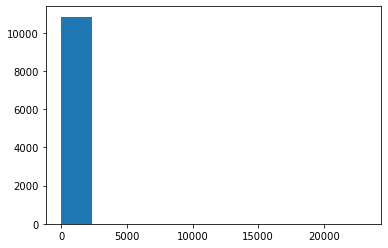

*** asm_commands_or: 4161


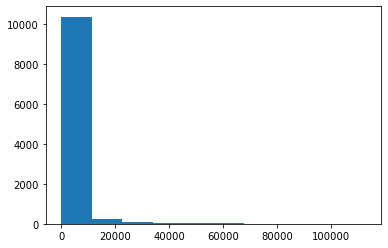

*** asm_commands_out: 258


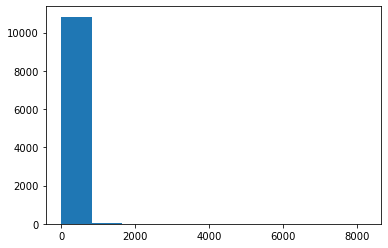

*** asm_commands_outs: 78


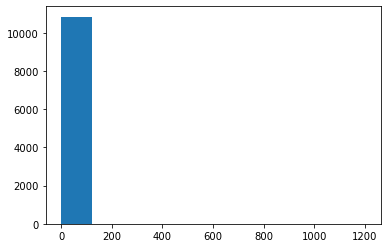

*** asm_commands_pop: 1643


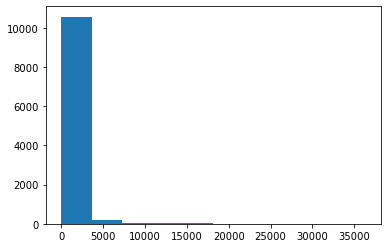

*** asm_commands_push: 2645


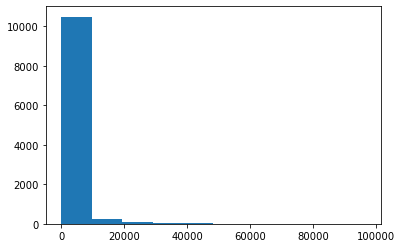

*** asm_commands_rcl: 121


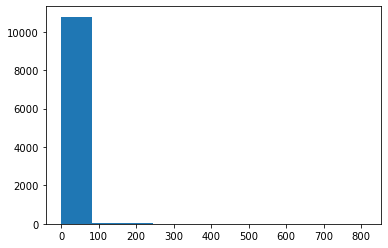

*** asm_commands_rcr: 93


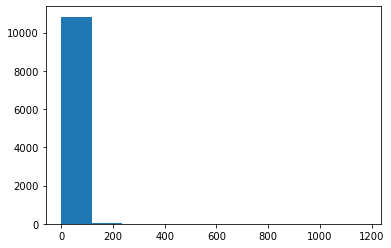

*** asm_commands_rep: 328


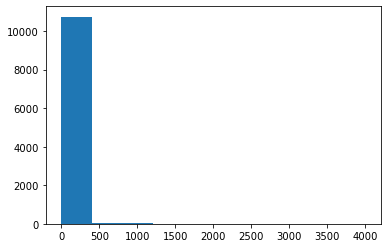

*** asm_commands_ret: 1238


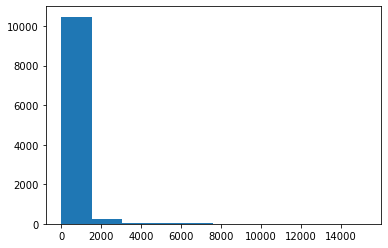

*** asm_commands_rol: 291


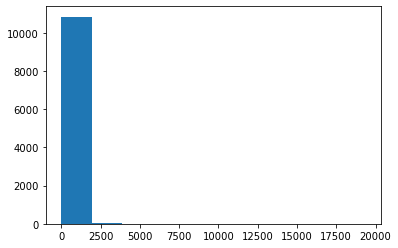

*** asm_commands_ror: 338


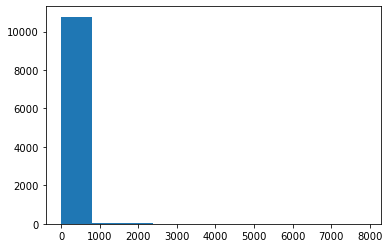

*** asm_commands_sal: 107


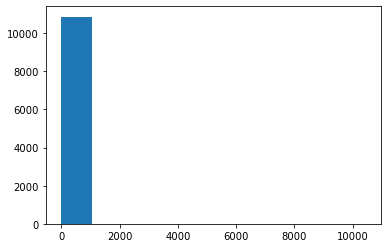

*** asm_commands_sar: 297


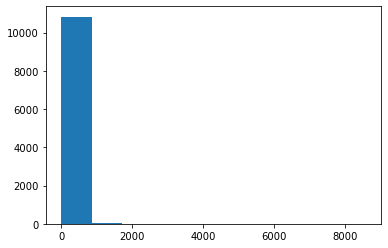

*** asm_commands_sbb: 318


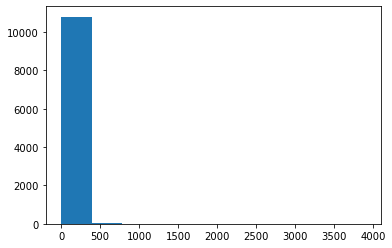

*** asm_commands_scas: 82


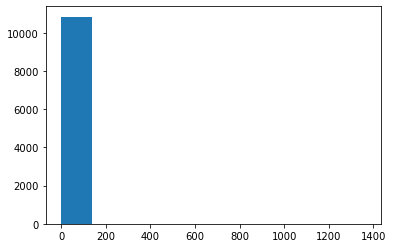

*** asm_commands_shl: 442


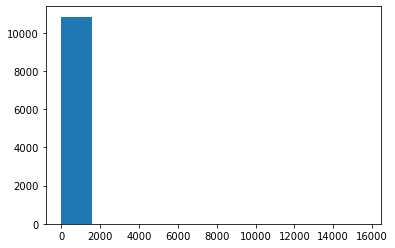

*** asm_commands_shr: 422


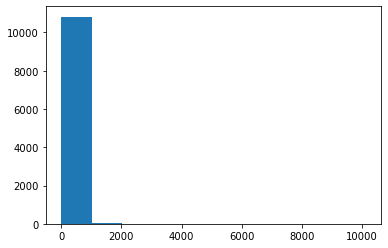

*** asm_commands_sidt: 18


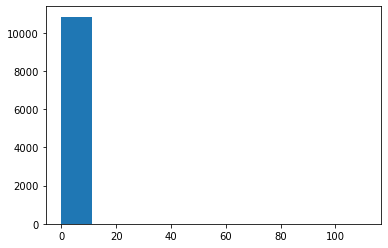

*** asm_commands_stc: 115


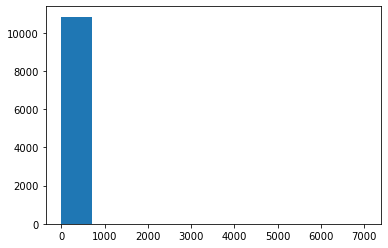

*** asm_commands_std: 855


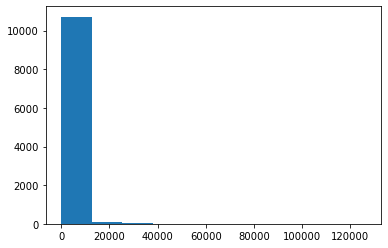

*** asm_commands_sti: 148


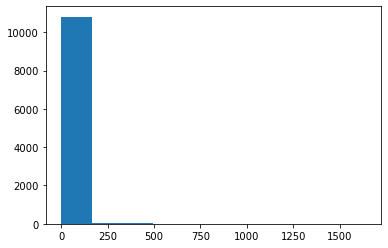

*** asm_commands_stos: 186


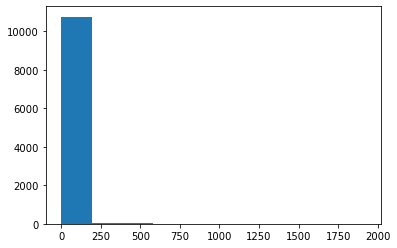

*** asm_commands_sub: 3002


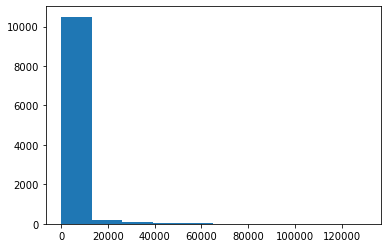

*** asm_commands_test: 1311


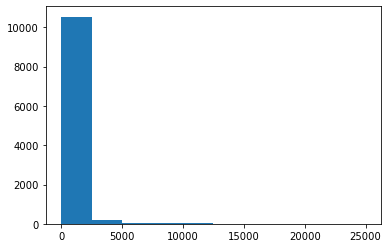

*** asm_commands_wait: 125


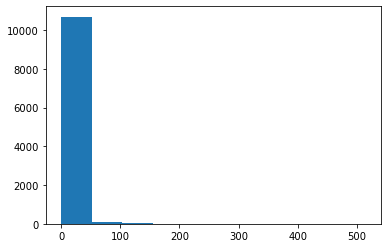

*** asm_commands_xchg: 196


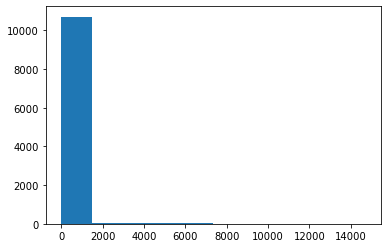

*** asm_commands_xor: 1309


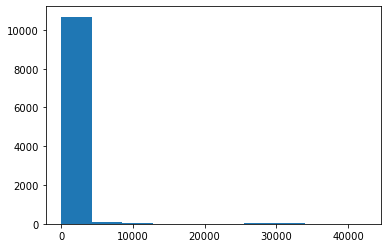

*** line_count_asm: 911


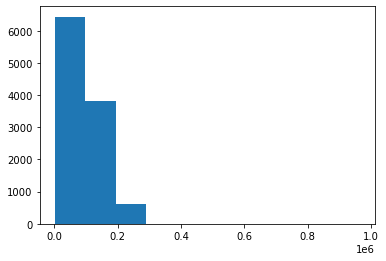

*** size_asm: 990


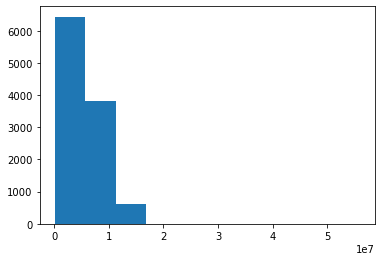

*** Class: 9


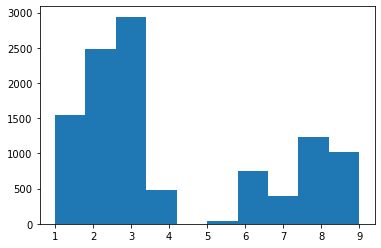

In [270]:
for col in num_columns:
    print(f'*** {col}: {df[col].nunique()}')
    plt.hist(df[col], bins=10)
    plt.show()

asm_commands_add


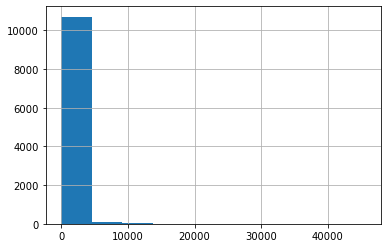


asm_commands_call


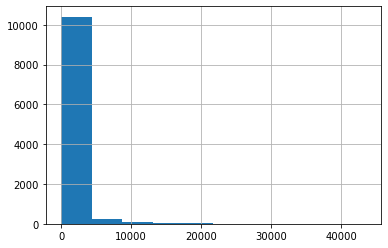


asm_commands_cdq


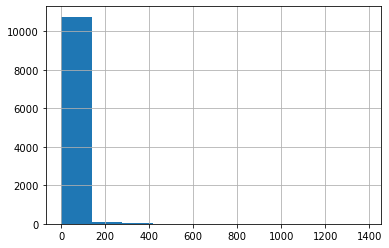


asm_commands_cld


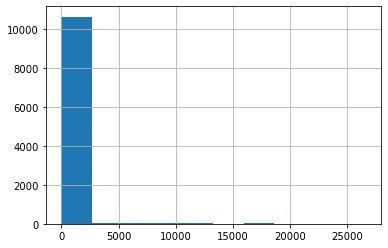


asm_commands_cli


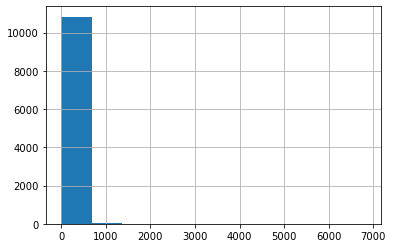


asm_commands_cmc


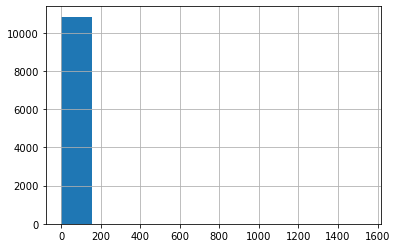


asm_commands_cmp


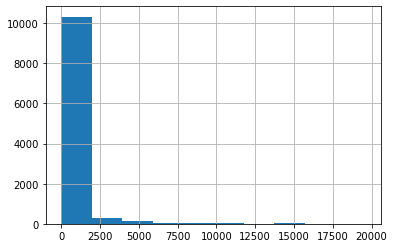


asm_commands_cwd


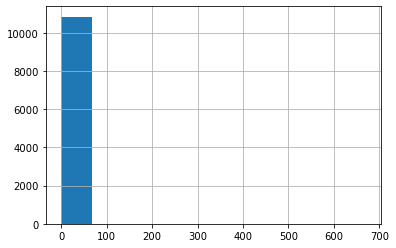


asm_commands_daa


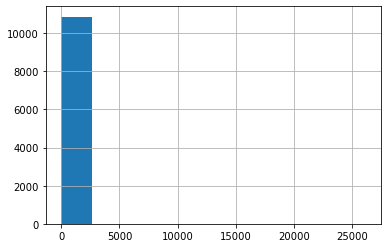


asm_commands_dd


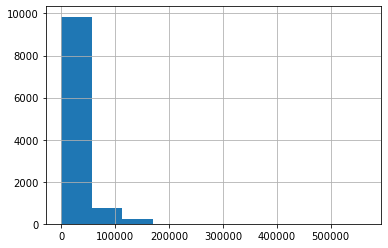


asm_commands_dec


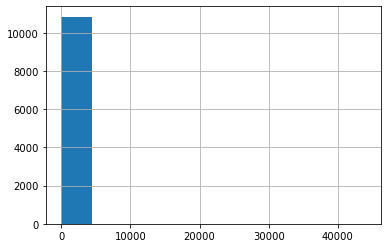


asm_commands_dw


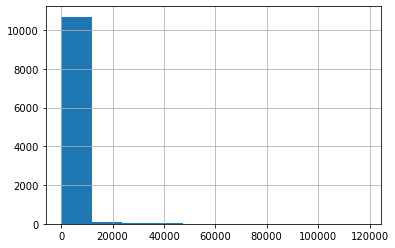


asm_commands_endp


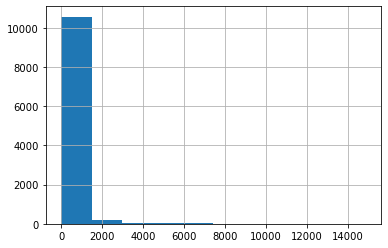


asm_commands_faddp


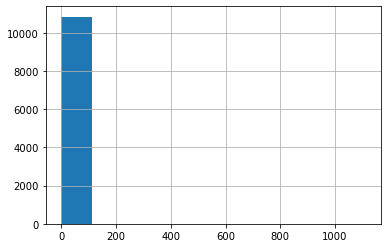


asm_commands_fchs


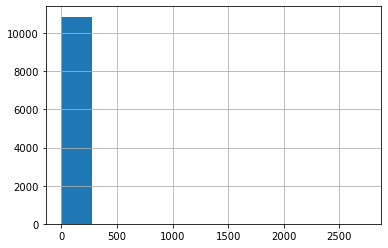


asm_commands_fdiv


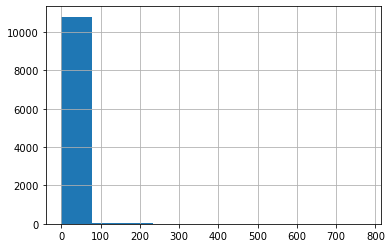


asm_commands_fdivr


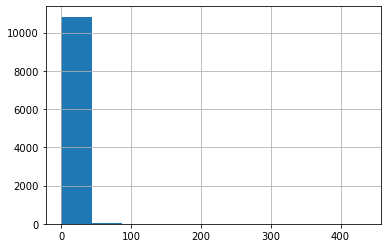


asm_commands_fistp


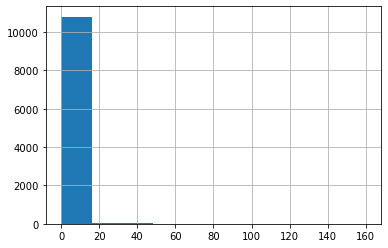


asm_commands_fld


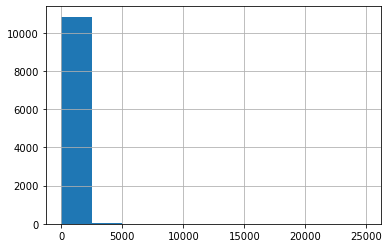


asm_commands_fstp


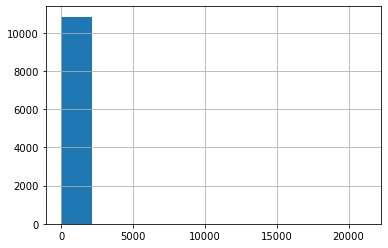


asm_commands_fword


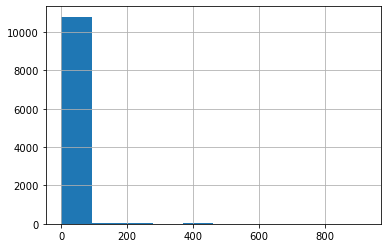


asm_commands_fxch


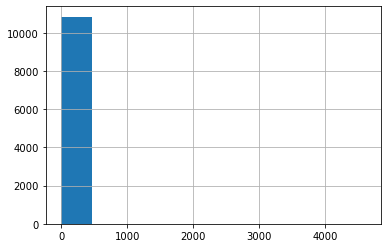


asm_commands_imul


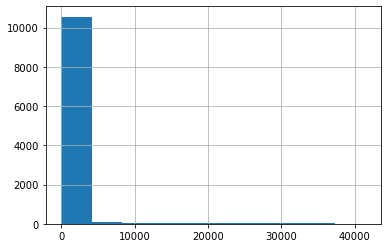


asm_commands_in


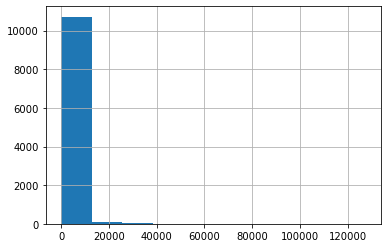


asm_commands_inc


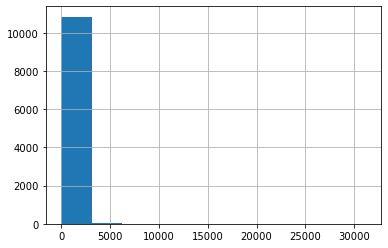


asm_commands_ins


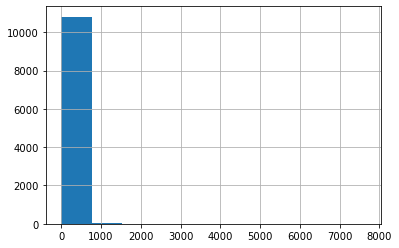


asm_commands_jb


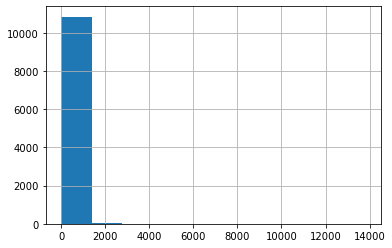


asm_commands_je


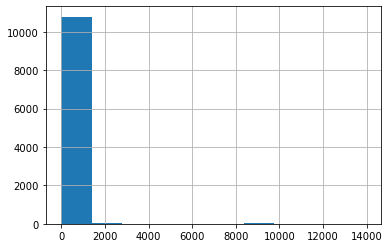


asm_commands_jg


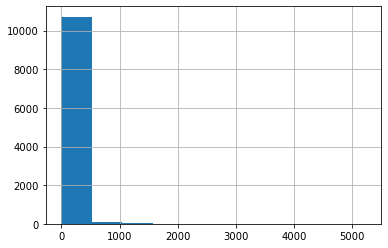


asm_commands_jl


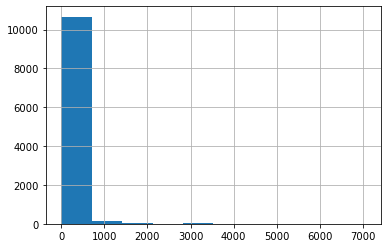


asm_commands_jmp


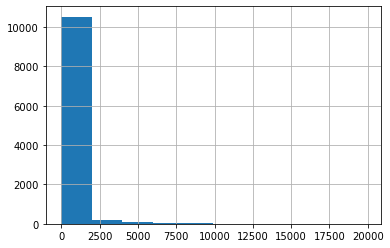


asm_commands_jnb


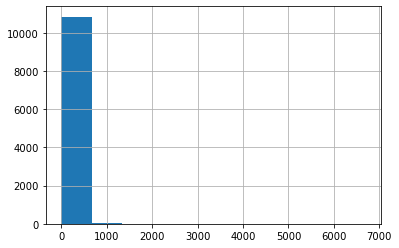


asm_commands_jno


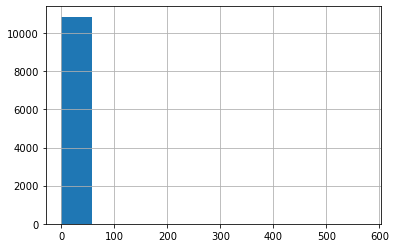


asm_commands_jo


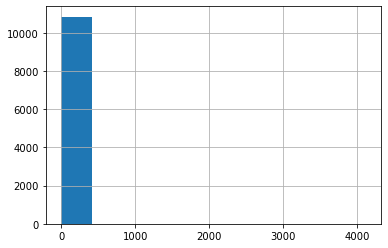


asm_commands_jz


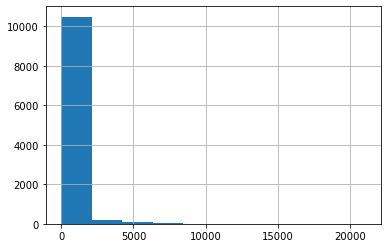


asm_commands_lea


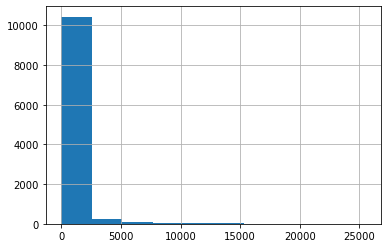


asm_commands_mov


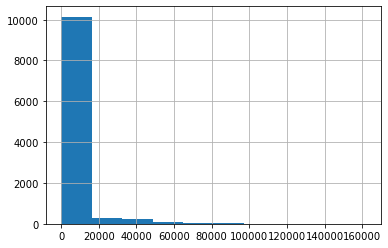


asm_commands_mul


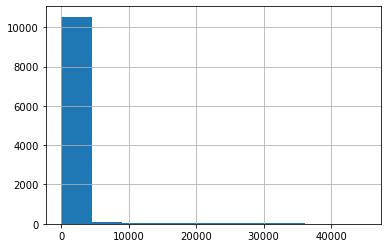


asm_commands_not


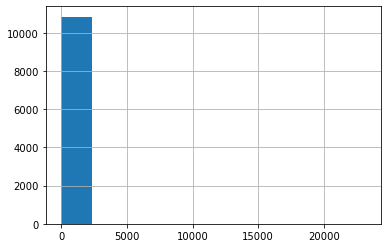


asm_commands_or


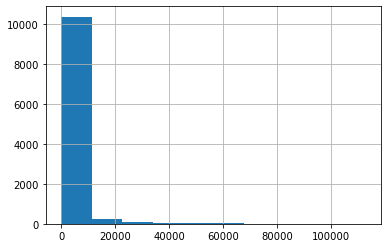


asm_commands_out


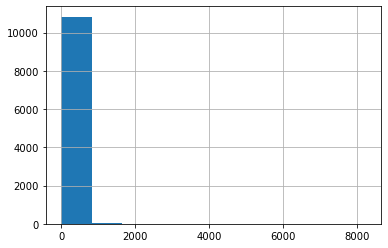


asm_commands_outs


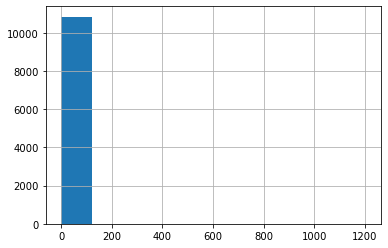


asm_commands_pop


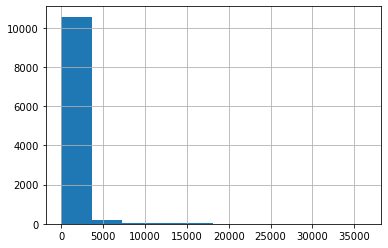


asm_commands_push


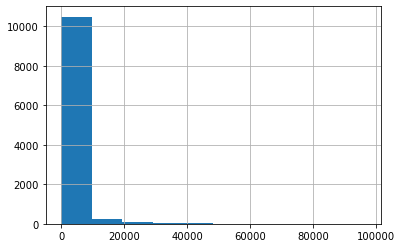


asm_commands_rcl


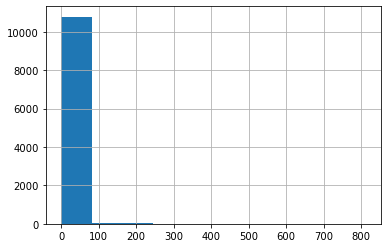


asm_commands_rcr


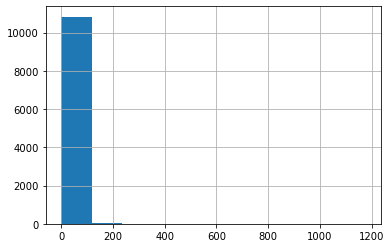


asm_commands_rep


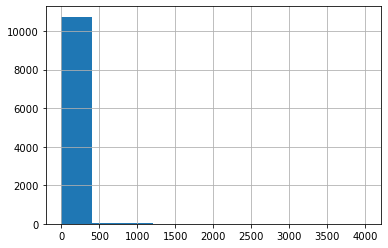


asm_commands_ret


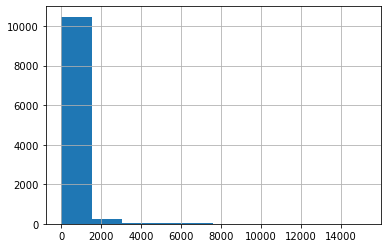


asm_commands_rol


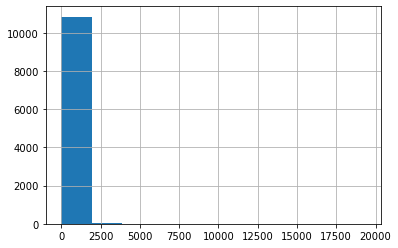


asm_commands_ror


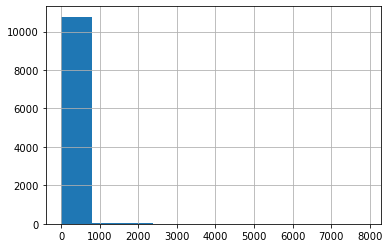


asm_commands_sal


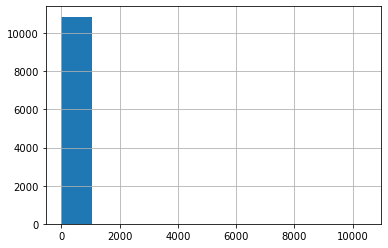


asm_commands_sar


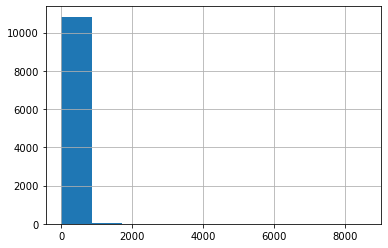


asm_commands_sbb


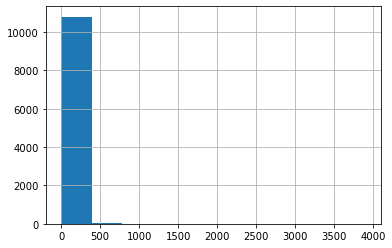


asm_commands_scas


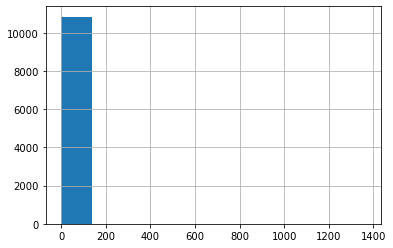


asm_commands_shl


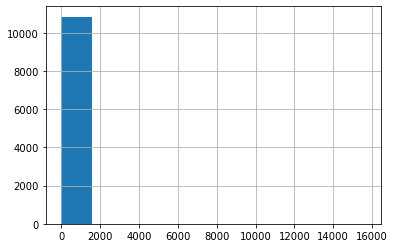


asm_commands_shr


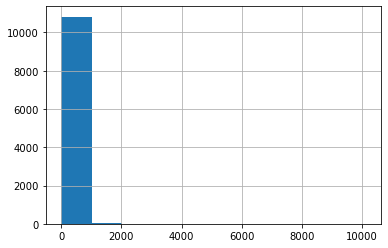


asm_commands_sidt


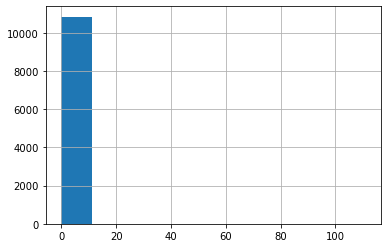


asm_commands_stc


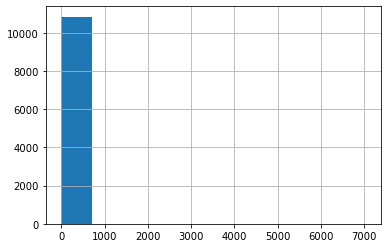


asm_commands_std


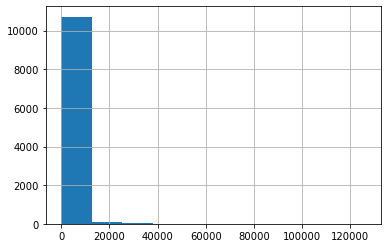


asm_commands_sti


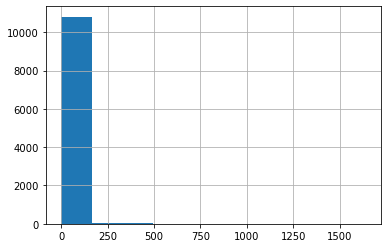


asm_commands_stos


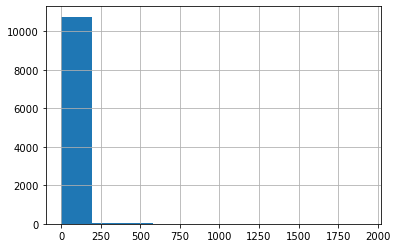


asm_commands_sub


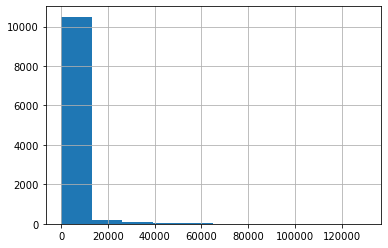


asm_commands_test


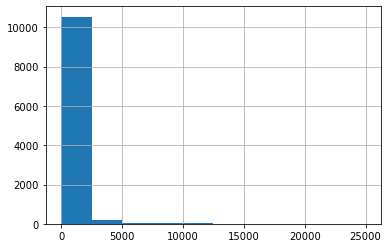


asm_commands_wait


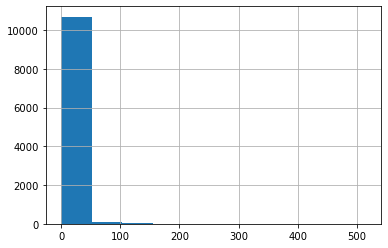


asm_commands_xchg


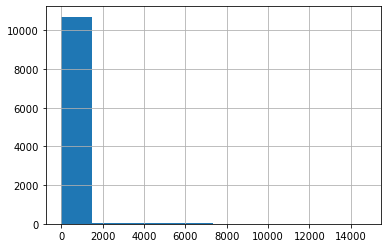


asm_commands_xor


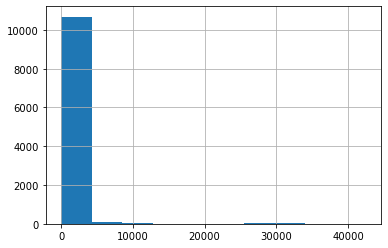


line_count_asm


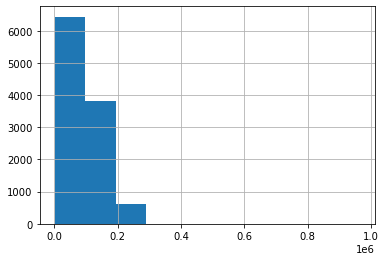


size_asm


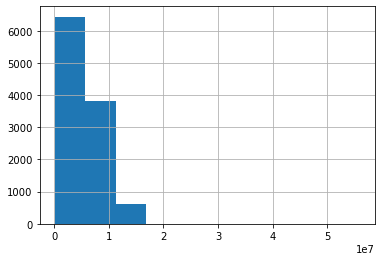


Class


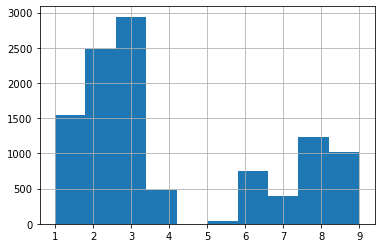

In [271]:
for col in df:
    print(col)
    df[col].hist(bins=10)
    plt.show()
    print()

I check individual statistical metrics for variables. We see a very high standard deviation, which
suggests that most of the variables are not normally distributed. Additionally, many variables although there are no missing values
consists mostly of zeros.

In [272]:
df.describe()

,asm_commands_add,asm_commands_call,asm_commands_cdq,asm_commands_cld,asm_commands_cli,asm_commands_cmc,asm_commands_cmp,asm_commands_cwd,asm_commands_daa,asm_commands_dd,...,asm_commands_sti,asm_commands_stos,asm_commands_sub,asm_commands_test,asm_commands_wait,asm_commands_xchg,asm_commands_xor,line_count_asm,size_asm,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,1.086800e+04,10868.000000
mean,724.463839,958.675377,10.774384,200.203165,16.794258,1.900074,480.152742,1.411115,221.034321,16995.688167,...,6.146669,15.102135,2156.040302,330.867777,6.230861,71.709698,493.072874,80667.184026,4.678640e+06,4.017851
std,1568.276158,2891.049563,39.071261,1567.778035,184.439789,35.070993,1384.428550,13.709346,498.249596,32916.498115,...,36.775391,55.051804,6674.654957,1107.955680,17.015893,581.487035,2468.536914,64475.348289,3.739570e+06,2.684621
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1942.000000,1.126280e+05,1.000000
25%,140.000000,178.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,217.000000,...,0.000000,0.000000,322.000000,7.000000,0.000000,0.000000,13.000000,15105.000000,8.760320e+05,2.000000
50%,362.000000,261.000000,0.000000,0.000000,1.000000,0.000000,134.500000,0.000000,37.000000,3328.500000,...,1.000000,1.000000,640.000000,50.000000,3.000000,1.000000,81.500000,75364.500000,4.371121e+06,3.000000
75%,766.000000,609.000000,16.000000,2.000000,6.000000,0.000000,401.000000,0.000000,183.000000,18256.000000,...,2.000000,22.000000,1383.000000,188.000000,7.000000,3.000000,273.000000,146433.000000,8.493056e+06,6.000000
max,45684.000000,43479.000000,1384.000000,26600.000000,6830.000000,1540.000000,19617.000000,670.000000,26147.000000,565024.000000,...,1641.000000,1924.000000,130324.000000,25008.000000,515.000000,14725.000000,42457.000000,963585.000000,5.588787e+07,9.000000


I divide the dataset into a test and training part. Set random seed for reproducible results. I choose the target variable accordingly.

In [273]:

seed = 7
test_size = 0.33
train, test = train_test_split(df, test_size=test_size, random_state=seed)

target_col = 'Class'
X_train, y_train = train.drop(target_col, axis=1), train[target_col]
X_test, y_test = test.drop(target_col, axis=1), test[target_col]

The data is divided into 9 unequal classes. The largest accounts for almost 30%, the smallest 0.3% of all records. This suggests using the methods of UnderSampler or OverSampler.

In [274]:
y_train.value_counts()


3    1978
2    1658
1    1047
8     818
9     652
6     507
4     324
7     268
5      29
Name: Class, dtype: int64

In [275]:
y_train.value_counts(normalize=True)

3    0.271666
2    0.227716
1    0.143799
8    0.112347
9    0.089548
6    0.069633
4    0.044499
7    0.036808
5    0.003983
Name: Class, dtype: float64

Algorithms

I test different algorithms to check which of them will best cope with the test sample.
First, we check the DummyClassifier. It does not show good results due to too many classes and too much data dispersion.

In [276]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.predict(X_train)




array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [277]:
print(dummy.score(X_test, y_test))
preds = dummy.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.2687482575968776
0.07222562596135769
0.2687482575968776
0.1138533598432828


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I check how the logistic regression will handle the data

In [278]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_train)
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.6275439085586841
0.46658996701059635
0.6275439085586841
0.5197443527225448


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


During the data analysis, it was possible to reach different orders of values for individual variables, which significantly weakens its
logistic regression results. So I'm implementing data scaling to minimize this problem

In [279]:
lr_model = make_pipeline(StandardScaler(),
                          LogisticRegression())
lr_model.fit(X_train, y_train)


lr = lr_model
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))
print(accuracy_score(y_test, preds))


0.9498187900752718
0.9489303800764065
0.9498187900752718
0.9486445302502697
0.9498187900752718


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To analyze the effectiveness of the models, I will use four measures: precision_score, recall_score, f1_score, and accuracy_score.
Their high values best reflect the correctness of the model, additionally, when used together, they allow you to assess whether the algorithm is performing
does not misunderstand.
Helpfully, in the case of the best models, I will also use the confusion matrix to see what class,
the algorithm has the biggest problem.

In [280]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [281]:
y_pred_lr_train=lr.predict(X_train)
y_pred_lr_test=lr.predict(X_test)
preds = lr_model.predict(X_test)
print('Classification Report : ',classification_report(y_train,y_pred_lr_train))
print('***********')
print('Classification Report : ',classification_report(y_test,y_pred_lr_test))

Classification Report :                precision    recall  f1-score   support

           1       0.92      0.95      0.93      1047
           2       0.99      0.98      0.99      1658
           3       0.99      1.00      0.99      1978
           4       0.90      0.99      0.94       324
           5       1.00      0.24      0.39        29
           6       0.92      0.96      0.94       507
           7       0.92      0.95      0.94       268
           8       0.96      0.91      0.93       818
           9       0.97      0.93      0.95       652

    accuracy                           0.96      7281
   macro avg       0.95      0.88      0.89      7281
weighted avg       0.96      0.96      0.96      7281

***********
Classification Report :                precision    recall  f1-score   support

           1       0.90      0.89      0.89       494
           2       0.98      0.98      0.98       820
           3       0.99      1.00      1.00       964
           4    

In [282]:
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred_lr_test))

Confusion Matrix :  [[438  10   0  10   1   4   3  21   7]
 [ 14 804   1   0   0   0   0   1   0]
 [  0   0 964   0   0   0   0   0   0]
 [  0   0   0 151   0   0   0   0   0]
 [  0   0   6   0   1   1   0   5   0]
 [  2   2   1   8   0 229   2   0   0]
 [  1   1   0   2   0   0 124   0   2]
 [ 27   2   0   7   0   3   3 366   2]
 [  6   2   0   0   1  21   0   1 330]]


The use of cross-validation will be an additional safeguard if the algorithm adapts too well to the data.
it will also help to avoid errors caused by inappropriate randomization of data into the test and training sets.

In [283]:
from sklearn.model_selection import cross_val_score
cs = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=10)
cs.mean()


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.8847689518985815

We have already checked how linear regression fared, now let's see how they will cope with the classification problem
individual algorithms: RandomForestClassifier, DecisionTreeClassifier, XGBClassifier, SVC.

In [284]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test, y_test))
preds = rf_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9882910510175634
0.988607022591111
0.9882910510175634
0.9883101903695858


In [285]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(dt_model.score(X_test, y_test))
preds = dt_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9693337050459995
0.969183421579634
0.9693337050459995
0.9691287285237202


In [286]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.988848620016727
0.9890504737353839
0.988848620016727
0.9888614907343504


In [287]:

cross_val_score(xgb_model, X_train,y_train, cv=10).mean()

0.9873652753282383

In [288]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))
preds = svc_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.5054362977418455
0.4116543275700344
0.5054362977418455
0.4446297129115361


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Like linear regressions, the SVC algorithm should be used on scaled data.

In [289]:
svr_model = make_pipeline(StandardScaler(),
                          SVC(random_state=42))
svr_model.fit(X_train, y_train)
print(svr_model.score(X_test, y_test))
preds = svr_model.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

0.9372734875940898
0.9363701083493202
0.9372734875940898
0.93568425541853


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So we can see that using the default parameters we can indicate that XGBClassifier works best
and RandomForestClassifier, and the worst SVC.

I am now checking how the results of individual algorithms will be affected by changes in class weights. However, this is not an optimal solution
to type it manually, so for automation, I'm closing it in a loop. Given the number of parameters we have in
For individual algorithms, however, it will be better to use ready-made functions such as RandomizedSearchCV and GridSearchCV

In [290]:
weights = [2, 5, 10, 20, 30, 50]

for w in weights:
    lr = LogisticRegression(class_weight={1:10, 1:w})
    lr.fit(X_train, y_train)
    
    preds = lr.predict(X_test)
    print(w)
    print(precision_score(y_test, preds, average='weighted'))
    print(recall_score(y_test, preds, average='weighted'))
    print(f1_score(y_test, preds, average='weighted'))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
0.4651126079605173
0.6275439085586841
0.5187150402618361


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5
0.4050416925139195
0.5695567326456649
0.4664729256751041


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10
0.41707373926405467
0.5508781711736828
0.4610496543800578


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20
0.39870224039599017
0.5296905492054642
0.4378070288647354


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30
0.40317641647210084
0.5280178422079732
0.4386653649536582
50
0.40158080704751375
0.520490660719264
0.4328238215083062


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [291]:
%%time
for w in weights:
    dt = DecisionTreeClassifier(class_weight={1:10, 1:w})
    dt.fit(X_train, y_train)
    
    preds = dt.predict(X_test)
    print(w)
    print(precision_score(y_test, preds, average='weighted'))
    print(recall_score(y_test, preds, average='weighted'))
    print(f1_score(y_test, preds, average='weighted'))

2
0.9661223477121677
0.9657095065514357
0.9658004740109127
5
0.9673994410423709
0.9673822135489267
0.9673003240704352
10
0.9691924089250185
0.9693337050459995
0.9692359247197968
20
0.9675294519208062
0.9673822135489267
0.9673959554122687
30
0.9667160572219442
0.9665458600501812
0.966521460454042
50
0.9636069919416542
0.9634792305547811
0.9633697258254983
Wall time: 1.42 s


On the occasion of working with tree algorithms, he visualizes on a graph what the division of data may look like.

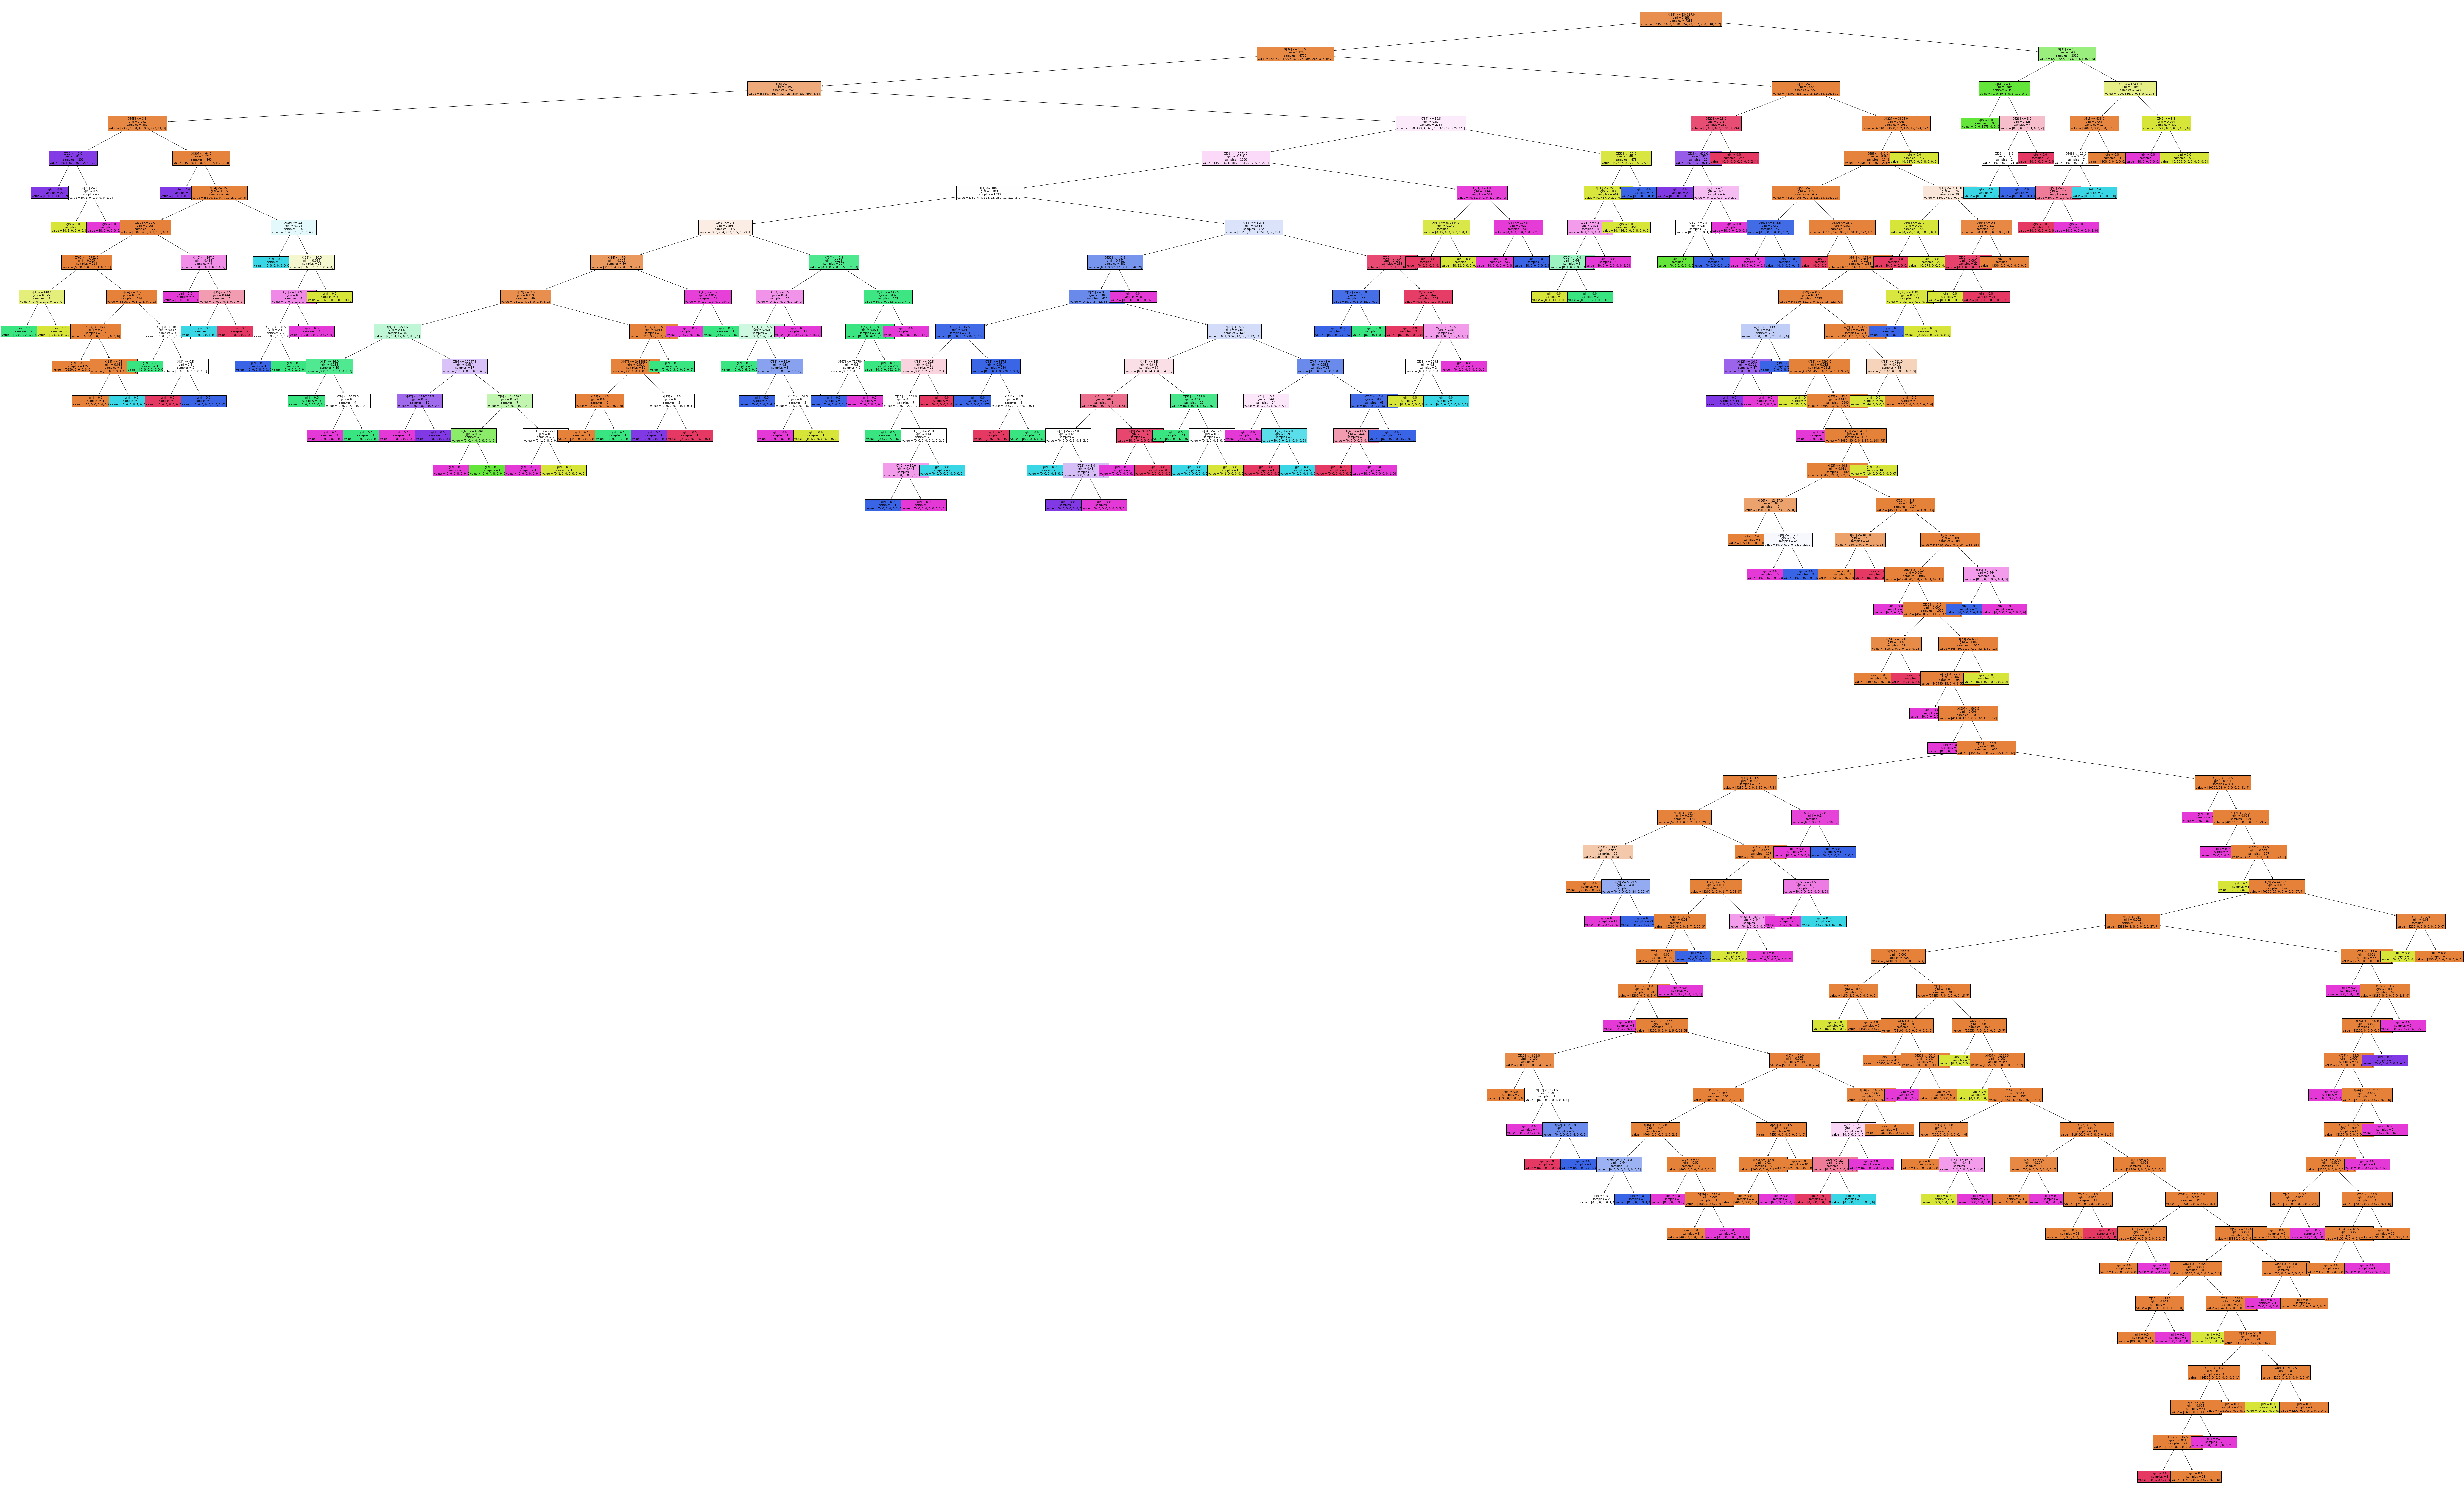

In [292]:
import sklearn
from sklearn.tree import plot_tree
plt.figure(figsize=(160,100))  
plot_tree(dt, fontsize=10, filled=True)  
plt.show()

In [293]:
dt.tree_.max_depth

42

In [ ]:
%%time
xgb = XGBClassifier()
params = {"n_estimators":[10,100,200],
         "learning_rate":ss.uniform(0.01,0.3),
          "max_depth": ss.randint(5,30),
         "min_child_weight":ss.randint(5,50),
         "reg_lambda":ss.uniform(0.1,3)}

cv = RandomizedSearchCV(cv=3, 
                        estimator=xgb,
                        param_distributions=params,
                        n_iter=10,
                        verbose=100)
cv.fit(X_train, y_train)

print(cv.score(X_test, y_test))
preds = cv.predict(X_test)
print(precision_score(y_test, preds, average='weighted'))
print(recall_score(y_test, preds, average='weighted'))
print(f1_score(y_test, preds, average='weighted'))

print(classification_report(y_test, preds))
print('Confusion Matrix : ',confusion_matrix(y_test,preds))
print(cross_val_score(cv, X_train,y_train, cv=10).mean())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 1/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.984 total time=  15.5s
[CV 2/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 2/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.988 total time=  17.1s
[CV 3/3; 1/10] START learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944
[CV 3/3; 1/10] END learning_rate=0.3062126312827742, max_depth=25, min_child_weight=5, n_estimators=200, reg_lambda=1.5176433317160944;, score=0.991 total time=  20.2s
[CV 1/3; 2/10] START lea

[CV 1/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.960 total time=  17.9s
[CV 2/3; 10/10] START learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807
[CV 2/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.968 total time=  16.3s
[CV 3/3; 10/10] START learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807
[CV 3/3; 10/10] END learning_rate=0.021679431543280416, max_depth=11, min_child_weight=31, n_estimators=100, reg_lambda=1.6110967829844807;, score=0.963 total time=  15.7s
0.9885698355171453
0.9887321425543836
0.9885698355171453
0.988581965270927
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       494
           2      

In [ ]:
# print(classification_report(y_test, preds))
# print('Confusion Matrix : ',confusion_matrix(y_test,preds))
# cross_val_score(cv, X_train,y_train, cv=10).mean()


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)

# X_tr = sc.transform(X_train)
# X_te = sc.transform(X_test)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# from sklearn.pipeline import Pipeline
#############
# pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
# pipe.fit(X_train, y_train)
# preds = pipe.predict(X_test)
#Mozna usunac

In [ ]:
#Mozna usunac
# print(classification_report(y_test, preds))
# print(precision_score(y_test, preds, average='weighted'))
# print(recall_score(y_test, preds, average='weighted'))
# print(f1_score(y_test, preds, average='weighted'))
# cross_val_score(pipe, X_train,y_train, cv=10).mean()

I see the algorithms have the highest percentage error with class 5 being the least.
I carry out an analysis of the number of classes. I see a big difference between it
the majority class and the minority class. So I introduce methods to minimize the differences and improve the performance of the algorithm.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts(normalize=True)

Tests the effects of hanging and downsampling on algorithms that performed best
yourself in the early part of the project.

In [ ]:
rus = RandomUnderSampler(random_state=42) 
X_res, y_res = rus.fit_resample(X_train, y_train)

In [ ]:
X_res.shape, y_res.shape

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
rus = RandomUnderSampler(sampling_strategy='not majority')
X_res, y_res = rus.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='all', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In individual measures, I check the difference between the sampled set and the training set

In [ ]:
X_train.shape

In [ ]:
X_res.shape

In [ ]:
removed = X_train.shape[0] - X_res.shape[0]
removed

In [ ]:
tl = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
X_res.shape, X_train.shape

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
X_res.shape

In [ ]:

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', n_jobs=-1)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
%%time
from imblearn.combine import SMOTETomek

smt = SMOTETomek(n_jobs=-1)

X_res, y_res = smt.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
sm = SMOTE()
tl = TomekLinks()

smtl = SMOTETomek(smote=sm, tomek=tl, n_jobs=-1)

X_res, y_res = smtl.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


xgb_model = XGBClassifier()
xgb_model.fit(X_res, y_res)
print("XGBClassifier")
print("score:", xgb_model.score(X_test, y_test))
preds = xgb_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
%%time
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import MinMaxScaler
ratios = [0.5, 0.33, 0.25, 0.2]
for ratio in ratios:
    print(f"Ratio: {ratio}")
    sm = SMOTENC(categorical_features = [1,2,3,4,5,6,7,8,9],sampling_strategy='minority', n_jobs=-1)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_res_final = pd.get_dummies(X_res)
    
    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    lr = LogisticRegression()
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_res_final)
    X_test_scaled = scaler.transform(pd.get_dummies(X_test))
    
    # train
    rf.fit(X_train_scaled, y_res)
    dt.fit(X_train_scaled, y_res)
    lr.fit(X_train_scaled, y_res)
    
    # predict
    preds_lr = lr.predict(X_test_scaled)
    preds_rf = rf.predict(X_test_scaled)
    preds_dt = dt.predict(X_test_scaled)
    
    # metrics 
    print(f"LR: {round(f1_score(y_test, preds_lr, average='weighted'), 3)}, {round(precision_score(y_test, preds_lr, average='weighted'), 3)}")
    print(f"RF: {round(f1_score(y_test, preds_rf, average='weighted'), 3)}, {round(precision_score(y_test, preds_rf, average='weighted'), 3)}")
    print(f"DT: {round(f1_score(y_test, preds_dt, average='weighted'), 3)}, {round(precision_score(y_test, preds_dt, average='weighted'), 3)}")

I use the voting method to increase the effectiveness of tree algorithms.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(DecisionTreeClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=500)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("BaggingClassifier")
print("score:", clf.score(X_test, y_test))
preds = clf.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))
print(classification_report(y_test, pred))

It plots the data on a graph to check which parameters will be best for the model

In [ ]:
scores = []
N = [3,5,10,20,50,100,200]
for n in N:
    clf = BaggingClassifier(DecisionTreeClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

In [ ]:
scores = []
N = [3,5,10,20,50,100,200]
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(X_train, y_train)
print("RandomForestClassifier")
print("score:",rf_model.score(X_test, y_test))
preds =rf_model.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))


In [ ]:
clf = BaggingClassifier(RandomForestClassifier(),max_features=0.5,max_samples=0.5,bootstrap=False,n_estimators=25)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("BaggingClassifier")
print("score:", clf.score(X_test, y_test))
preds = clf.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))
print(classification_report(y_test, pred))

In [ ]:
scores = []
N = range(1,60)
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(f1_score(y_test, clf.predict(X_test),average="weighted"))

plt.plot(N,scores)
plt.show()

It uses GridSearchCV, BaggingClassifier and standardizations to improve the performance of the algorithm

In [ ]:
pipe = Pipeline([('std',StandardScaler(with_mean=False,with_std=True)),('model',SVC(kernel="poly",C=1,degree=3))])
pipe.fit(X_train, y_train)
print("Pipeline_SVC")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
pipe = Pipeline([('std',StandardScaler(with_mean=False,with_std=True)),('model',BaggingClassifier(SVC(kernel="poly",C=1,degree=3),n_estimators=100))])
pipe.fit(X_train, y_train)
print("Pipeline_BaggingClassifier")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
models = [SVC(), 
          BaggingClassifier(RandomForestClassifier())]
param_list = [
        [
            {"model__kernel":["linear"]},
            {"model__kernel":["rbf"]},
            {"model__kernel":["poly"],"model__degree":[2,3]}
        ],
              
          {"model__base_estimator__min_samples_leaf":[1,5,10,15],
          "model__n_estimators":[10,25,50,100,200]}
         ]

In [ ]:
for model, params in zip(models, param_list):
    pipe = Pipeline([("scale",StandardScaler()),("model",model)])
    gs = GridSearchCV(pipe,params)
    gs.fit(X_train,y_train)
   
    print(gs.best_params_)
#     print(f1_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("precision_score:", precision_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("recall_score:", recall_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))
    print("f1_score:", f1_score(y_test, gs.best_estimator_.predict(X_test),average="weighted"))

I check how the Multi-layer Perceptron Classifier will deal with our data.

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
cls_model = MLPClassifier(
    hidden_layer_sizes=(9,8, 4,3,4,2,9),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000,
    batch_size=320)

cls_model.fit(X_train_sc, y_train)

y_pred = cls_model.predict(X_test_sc)
print(classification_report(y_test, y_pred))

In [ ]:
for hidden_layer_size in [3,5,10,15,25,50,100,200,300,500]:
    rnd.seed(7)
    
    model = MLPClassifier(hidden_layer_size, activation="relu", max_iter=10000, alpha=0.001, tol=0.000001, batch_size=300)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)
    

    print(hidden_layer_size, "Iter: ",model.n_iter_)
    preds = y_pred
    print("precision_score:", precision_score(y_test, preds, average='weighted'))
    print("recall_score:", recall_score(y_test, preds, average='weighted'))
    print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
import itertools

for h1, h2 in itertools.product([2,5,10,20,30,90],[10,5,3,2,20,90]):
    rnd.seed(7)
    
    model = MLPClassifier((h1,h2), activation="relu", max_iter=10000, alpha=0.0001, tol=0.0001, batch_size=300)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)
    

    
    print(h1, h2,"Iter: ",model.n_iter_)

    preds = y_pred
    print("precision_score:", precision_score(y_test, preds, average='weighted'))
    print("recall_score:", recall_score(y_test, preds, average='weighted'))
    print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
rnd.seed(7)
model = MLPClassifier(10, activation="relu", early_stopping=True, validation_fraction=0.2, n_iter_no_change=30, batch_size=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_fitted = model.predict(X_train)

print(h1, h2,"Iter: ",model.n_iter_)

preds = y_pred
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

The Sequential class was used to check the operation of the algorithm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),metrics=["accuracy"])
model.summary()


In [ ]:
model.fit(X_res, y_res)
preds = model.predict(X_test)

print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

In [ ]:
history = model.fit(X_train, y_train, batch_size=160, epochs=100)

In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(X_train, y_train, batch_size=16, callbacks=[early_stopping], validation_split=0.15, epochs=100)
preds = model.predict(X_test)

print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))

Finally, we use linear dimensionality reduction to project it to a lower dimensional space

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(scale(X_train))
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(3)),('rfc',RandomForestClassifier())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("PCA")
print("score:", pipe.score(X_test, y_test))
preds = pipe.predict(X_test)
print("precision_score:", precision_score(y_test, preds, average='weighted'))
print("recall_score:", recall_score(y_test, preds, average='weighted'))
print("f1_score:", f1_score(y_test, preds, average='weighted'))